# Visualizing Earnings Based on College Majors

In this project we are goint to explore the relationships between college majors, earnings and gender distribution.

We're going to use pandas and matplotlib

Here is the dataset dictionary:

* `Rank` - Rank by median earnings (the dataset is ordered by this column).
* `Major_code` - Major code.
* `Major` - Major description.
* `Major_category` - Category of major.
* `Total` - Total number of people with major.
* `Sample_size` - Sample size (unweighted) of full-time.
* `Men` - Male graduates.
* `Women` - Female graduates.
* `ShareWomen` - Women as share of total.
* `Employed` - Number employed.
* `Median` - Median salary of full-time, year-round workers.
* `Low_wage_jobs` - Number in low-wage service jobs.
* `Full_time` - Number employed 35 hours or more.
* `Part_time` - Number employed less than 35 hours.

First we need to import our libraries and modules

In [1]:
import pandas as pd
import matplotlib
from pandas.plotting import scatter_matrix
%matplotlib inline

In [2]:
recent_grads = pd.read_csv('recent-grads.csv')

After reading the CSV file, we need to initially explore our dataframe to get a sense of what king of data we have.

In [3]:
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [4]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [5]:
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [6]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


We have empty rows so we need to remove them in order to matplotlib work properly.

In [7]:
raw_data_count = recent_grads.shape[0]
recent_grads = recent_grads.dropna()
cleaned_data_count = recent_grads.shape[0]
print(raw_data_count,cleaned_data_count)

173 172


Now we are going to visually explore our dataframe using scatter plots to see if we can spot any correlations.

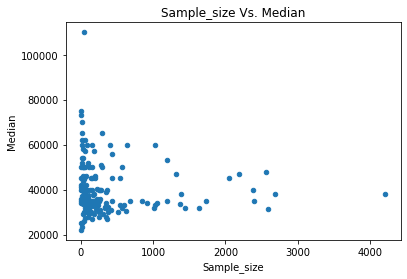

In [8]:
recent_grads.plot(x='Sample_size',y='Median',kind='scatter',title='Sample_size Vs. Median')

#### Do students in more popular majors make more money?

We saw no correlation between sample size and median salary.

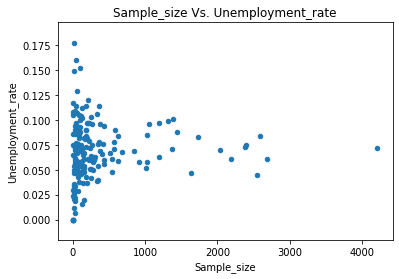

In [9]:
recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter', title = 'Sample_size Vs. Unemployment_rate')

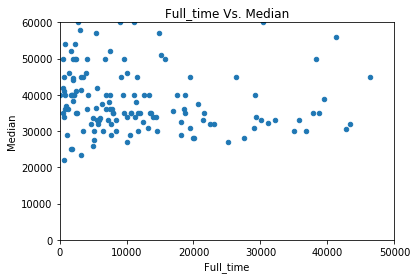

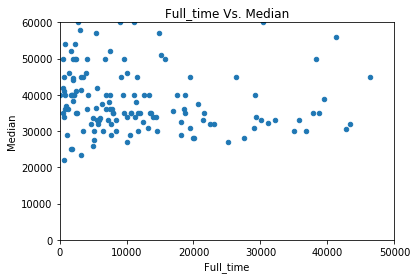

In [10]:
recent_grads.plot(x='Full_time', y='Median', kind='scatter', title='Full_time Vs. Median', xlim=(0,50000), ylim=(0,60000))
recent_grads.plot(x='Full_time', y='Median', kind='scatter', title='Full_time Vs. Median', xlim=(0,50000), ylim=(0,60000))

#### Is there any link between the number of full-time employees and median salary?

No correlation



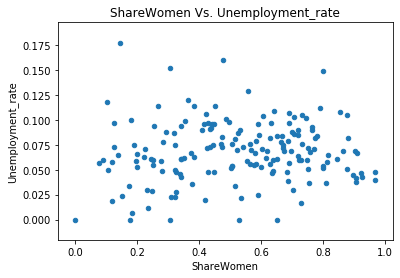

In [11]:
recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter', title='ShareWomen Vs. Unemployment_rate')

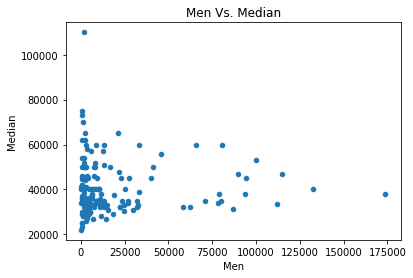

In [12]:
recent_grads.plot(x='Men', y='Median', kind='scatter', title='Men Vs. Median')

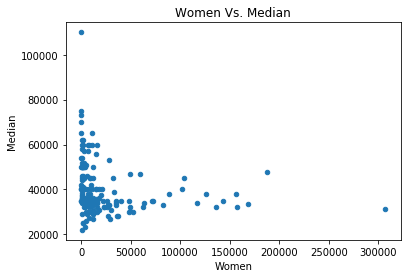

In [13]:
recent_grads.plot(x='Women', y='Median', kind='scatter', title='Women Vs. Median')

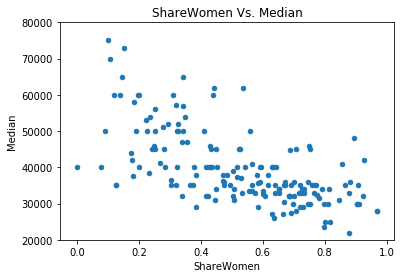

In [14]:
recent_grads.plot(x='ShareWomen',y='Median', kind='scatter', title='ShareWomen Vs. Median', ylim=(20000,80000))

#### Do students that majored in subjects that were majority female make more money?

Actually we saw a weak negative correlation between subjects that had a higher women/men relation and the median salary.

Now we are going to explore data using Histograms so we can find value ranges and their frequency.

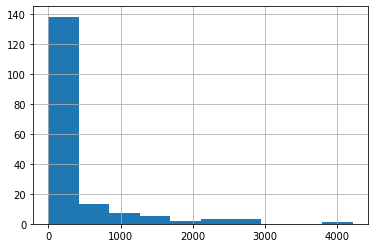

In [15]:
recent_grads['Sample_size'].hist()

### What is the most common salary range?

The most common median salary range is 30.800-39.600

(30800.0, 39600.0]      75
(39600.0, 48400.0]      40
(21911.999, 30800.0]    24
(48400.0, 57200.0]      18
(57200.0, 66000.0]      11
(66000.0, 74800.0]       2
(101200.0, 110000.0]     1
(74800.0, 83600.0]       1
(92400.0, 101200.0]      0
(83600.0, 92400.0]       0
Name: Median, dtype: int64

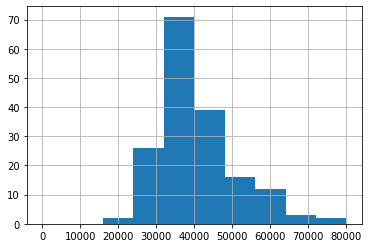

In [16]:
recent_grads['Median'].hist(bins=10, range=(0,80000))
recent_grads['Median'].value_counts(bins=10)

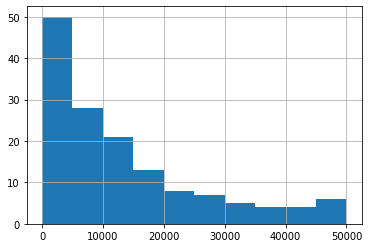

In [17]:
recent_grads['Employed'].hist(range=(0,50000))

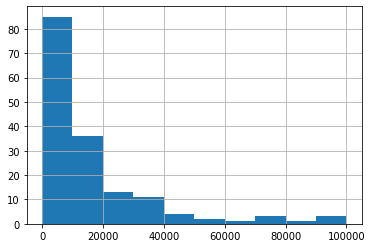

In [18]:
recent_grads['Full_time'].hist(range=(0,100000))

80

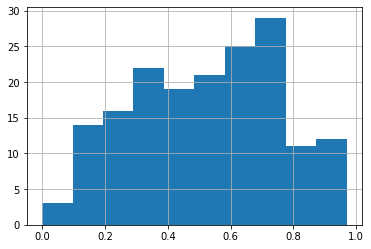

In [19]:
recent_grads['ShareWomen'].hist()
recent_grads['ShareWomen'].value_counts(bins=40).sort_index().head(21).sum()

### How many courses are predominantly male?

Out of 172 courses, 80 are predominantly male, which means ~46%.

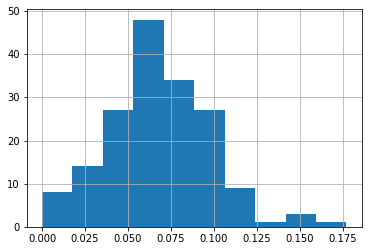

In [20]:
recent_grads['Unemployment_rate'].hist()

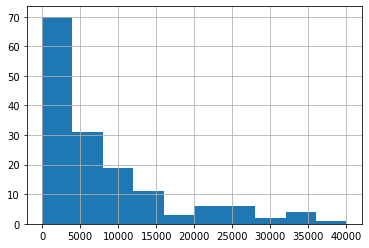

In [21]:
recent_grads['Men'].hist(range=(0,40000))

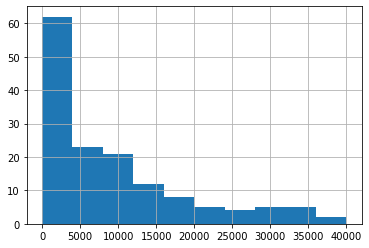

In [22]:
recent_grads['Women'].hist(range=(0,40000))

Using matrix we can analyze different axes combinations and plots in the same figure.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C1A489A788>,
      dtype=object)

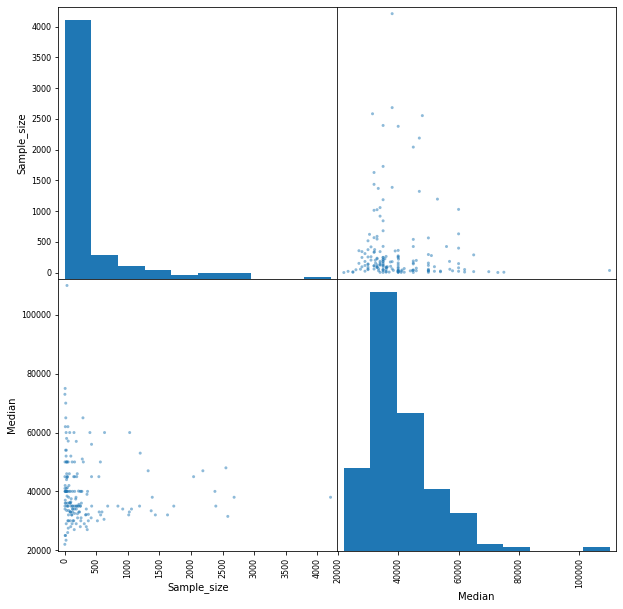

In [23]:
scatter_matrix(recent_grads[['Sample_size','Median']], figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C1A4B0AC48>,
      dtype=object)

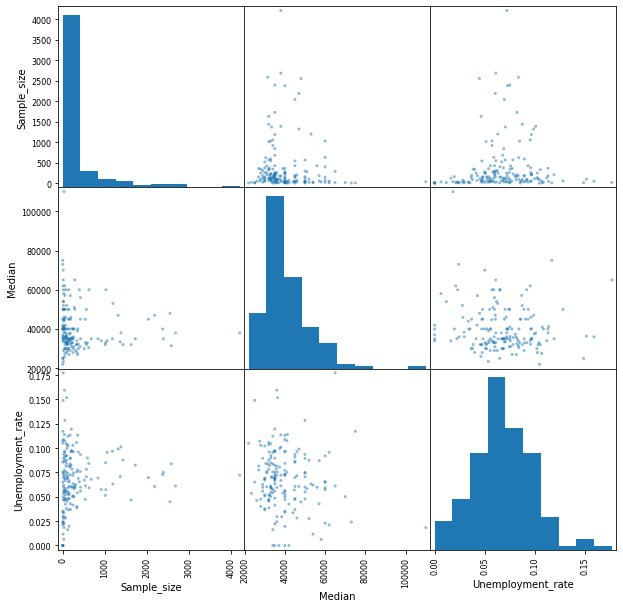

In [24]:
scatter_matrix(recent_grads[['Sample_size','Median','Unemployment_rate']], figsize=(10,10))

At the end we can use bar plots to compare values from the top 10 majors and the bottom 10 all together.

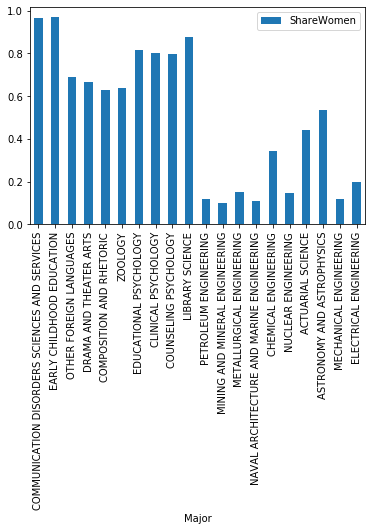

In [25]:
recent_grads[-10:].append(recent_grads[:10])[['ShareWomen','Major']].plot.bar(x='Major', y='ShareWomen')

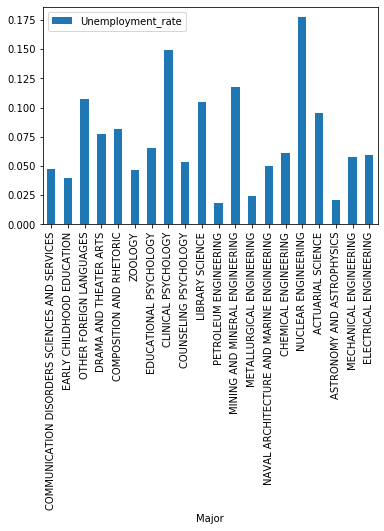

In [26]:
recent_grads[-10:].append(recent_grads[:10])[['Unemployment_rate','Major']].plot.bar(x='Major', y='Unemployment_rate')